In [3]:
import numpy as np
import cmath as CM
import math as M
import matplotlib.pyplot as plt

In [2]:
phase=[0, 0.5]
ampl=[122,122]
width=1280
height=1024
noise=30
meanPeriod=1024
rndPeriod=100
numOfWaves=2

In [97]:
def genImg(phase=[0, 0.5], ampl=[122,122], width=1280, height=1024, noise=10, meanPeriod=1024, rndPeriod=100, numOfWaves=2):
    meanPeriod,rndPeriod = map( lambda x: x*width if isinstance(x,float) else x, [meanPeriod, rndPeriod])
    img=np.zeros((width, height))
    K=np.zeros((numOfWaves,2))
    phi=np.zeros(numOfWaves)
    phi0=np.random.rand()*2*M.pi
    
    for i in range(numOfWaves):
        k=2*M.pi/(meanPeriod+(2*np.random.randn()-1)*rndPeriod)
        a=np.random.rand()*2*M.pi
        K[i][0]=k*M.cos(a)
        K[i][1]=k*M.sin(a)
        phi[i]=phi0+a*M.pi*phase[i]
    
    for i in range(width):
        for j in range(height):
            a=0+0j
            for k in range(numOfWaves):
                a+=ampl[k]*CM.exp(1j*(K[k][0]*i+K[k][1]*j+phi[k]))
            img[i][j]=abs(a)+noise*(1-2*np.random.randn())
            if img[i][j]>255: 
                img[i][j]=255
            elif img[i][j]<0:
                img[i][j]=0
            
    return img

def genImg_np(
    phase=[0, 0.5], ampl=[0.5,0.5],
    width=1280, height=1024,
    meanPeriod=0.4, rndPeriod=0.1,
    numOfWaves=2, noise=0.1
):
    img=np.zeros((width, height))
    K=np.zeros((numOfWaves,2))
    phi=np.zeros(numOfWaves)
    phi0=np.random.rand()*2*M.pi
    
    for i in range(numOfWaves):
        k=2*M.pi/(meanPeriod+(2*np.random.randn()-1)*rndPeriod)
        a=np.random.rand()*2*M.pi
        K[i][0]=k*M.cos(a)
        K[i][1]=k*M.sin(a)
        phi[i]=phi0+a*M.pi*phase[i]
    
    img += np.random.randn(width,height)*noise
    
    x = np.linspace(0,1,width)
    y = np.linspace(0,1,height)
    mesh = np.meshgrid(x, y, sparse=True)  # make sparse output arrays
    mesh = np.array(mesh)

    a = np.sum([
        ampl[k]*np.exp( 
            1j*(np.dot(K[k],mesh)+phi[k]) 
            - 5*((mesh[0] -0.5 )**2 + (mesh[1] - 0.5)**2)
        ) 
        for k in range(numOfWaves)
    ],axis=0)
    #print(a.shape,img.shape)
    img += np.real(a).T
    img = 128*np.clip(img,-1,1)+127
    

    #map(assign_amp,img)
            
    return img


In [112]:
%%time
i = genImg_np(meanPeriod=0.6,rndPeriod=0.1,numOfWaves=1,phase=[0],ampl=[0.56])

CPU times: user 222 ms, sys: 14 ms, total: 236 ms
Wall time: 238 ms


<IPython.core.display.Javascript object>


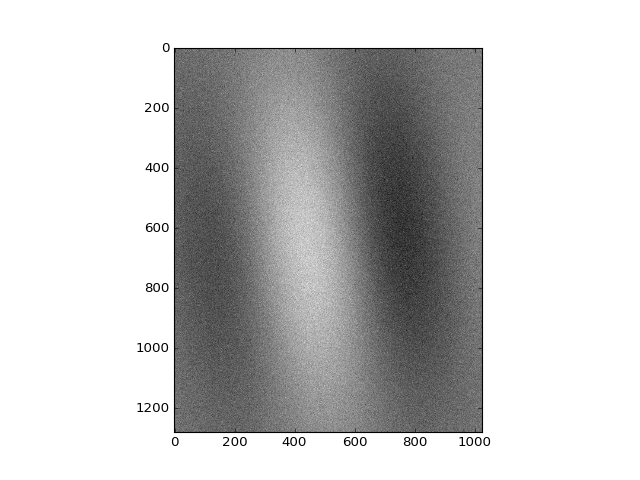

In [115]:
plt.imshow(i.astype(np.int),cmap='gray')

In [114]:
a = np.ones((10,10))
aa = np.array(map(lambda x: 12*x, a))
print(aa)
np.clip(np.random.randn(10,10),0,1)

array([[0.44917324, 0.96800777, 0.        , 0.61959607, 0.        ,
        0.        , 0.        , 0.80970355, 0.42104265, 0.25890715],
       [0.31577751, 1.        , 0.63241728, 0.        , 0.89879942,
        0.        , 0.92107241, 0.12146097, 0.4369185 , 0.        ],
       [0.07053441, 1.        , 0.        , 0.        , 0.38547594,
        0.        , 1.        , 1.        , 1.        , 0.        ],
       [0.1883019 , 0.53069198, 0.        , 1.        , 0.        ,
        0.        , 0.36825367, 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.07058936, 0.        ,
        0.42193067, 0.        , 0.27435329, 0.        , 0.33146533],
       [1.        , 0.87361021, 0.54940785, 1.        , 0.1863288 ,
        1.        , 1.        , 0.        , 1.        , 0.85229523],
       [0.        , 0.        , 0.01059735, 0.        , 1.        ,
        0.        , 0.02943883, 0.        , 0.        , 0.42266568],
       [0.64424103, 0.33903808, 0.       

27.66526157326278


<IPython.core.display.Javascript object>


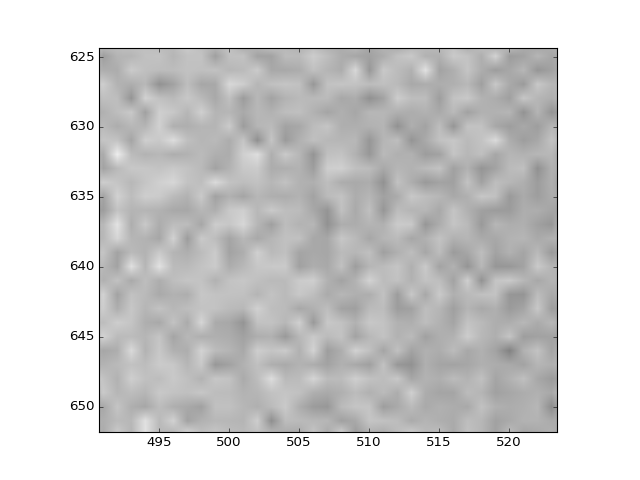

In [111]:
from scipy import fftpack
ff=fftpack.fft2(i)
ff= fftpack.fftshift(ff)
im_ff=np.abs(ff)

im_ff=np.log10(im_ff-np.min(im_ff)+0.1) 
s = 255/(np.max(im_ff)-np.min(im_ff))
print(s)
im_ff-=np.min(im_ff)

#plt.figure(figsize=(10,10))
%matplotlib notebook

plt.imshow(im_ff,interpolation=None)